From Newman, Chapter 6

## Binary search method / Bisection method ##

<img src="./newman/fig6-3.png" width="300"><br>
**Fig 6.3. The binary search method.** If $f(x_1)$ and $f(x_2)$ have opposite signs, one positive and one negative, and if $f(x)$ is continuous from $x_1$ to $x_2$, then there must be at least one root of $f(x)$ between $x_1$ and $x_2$. By looking at the sign of the function at the midpoint between $x_1$ and $x_2$ denoted $x'$ here, we can determine whether the root lies in the left or the right half of the interval.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def trig_function(x):
    return np.sin(x) - np.cos(x)

In [3]:
def poly_function(x):
    return 3*x**2 - 10*x + 1

In [4]:
def midpoint(left, right):
    return (left+right)/2.

In [5]:
def bisection(f, a, b, resolution):
    left = a
    right = b
    midpt = midpoint(left, right)

    if (f(left)*f(right))>=0:
        print("Can't use the bisection method - zero or even number of crossings")
        return np.NaN, np.NaN
    
    while (right-midpt) > resolution:
        if (f(left)*f(midpt)) < 0: #crossing occurred
            right = midpt
        else:
            left = midpt
        midpt = midpoint(left, right)
    return midpt, resolution

In [6]:
print("%f plus/minus %f" % bisection(poly_function, 0, 2, 0.000001))

0.103194 plus/minus 0.000001


In [7]:
def plot_function(f, a, b):
    n = 100
    x = np.linspace(a, b, n)
    plt.plot(x, f(x))
    plt.plot(x, np.zeros(n))
    plt.xlabel('x')
    plt.legend([r'$f(x)$', r'$0$'])

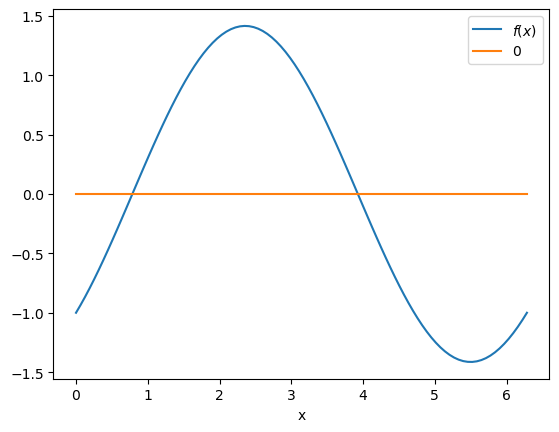

In [8]:
plot_function(trig_function, 0, 2*np.pi)

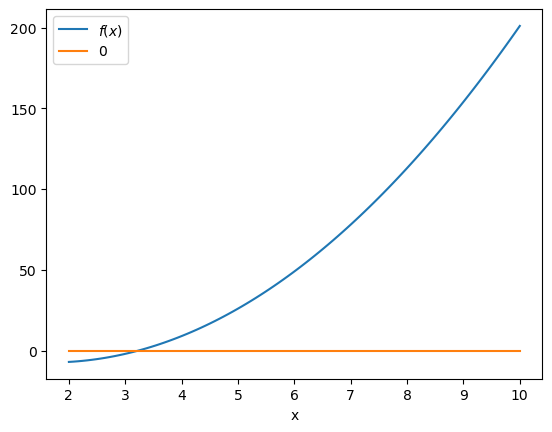

In [9]:
plot_function(poly_function, 2, 10)

## Newton's method

<img src="./newman/fig6-6.png" width="300"><br>
**Fig 6.6. Newton's method.** Newton's method takes a single estimate $x$ of the root of a function and uses the slope of the function at that point to extrapolate a better estimate $x'$.

In [10]:
def trig_function(x):
    return np.sin(x)

def deriv_trig_function(x):
    return np.cos(x)

In [11]:
def newton_step(f, slope, x):
    #slope(x) = f(x)/delta_x
    delta_x = f(x)/slope(x)
    #delta_x = x - x_prime
    x_prime = x - delta_x
    return x_prime, delta_x

def newton(f, slope, x_init, resolution):
    iterations = 0
    max_iterations = 10
    x, delta_x = newton_step(f, slope, x_init)
    while abs(delta_x) > resolution and iterations < max_iterations:
        x, delta_x = newton_step(f, slope, x)
        iterations += 1
        #print(iterations)
        if iterations == max_iterations:
            print('Eject! I do not think it is going to work.')
    return x, delta_x

In [16]:
print("%f plus/minus %f" % newton(trig_function, deriv_trig_function, 3, 0.000001))
newton(trig_function, deriv_trig_function, 3, 0.000001)

3.141593 plus/minus -0.000000


(3.141592653589793, -2.8931624907621843e-10)

## Golden ratio search

<img src="./newman/fig6-9.png" width="300"><br>
**Fig 6.9. Golden ratio search.** Suppose there is a minimum of the function $f(x)$ between $x_1$ and $x_4$. If the function is lower at $x_2$ than at $x_3$, as shown here, then we know the minimum must lie between $x_1$ and $x_3$; otherwise, it lies between $x_2$ and $x_4$. Either way, we have narrowed the range in which it lies.